In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
dataDir='/media/greghovhannisyan/BackupData1/mscoco/'
dataType='train2017'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)

In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=15.57s)
creating index...
index created!


In [48]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

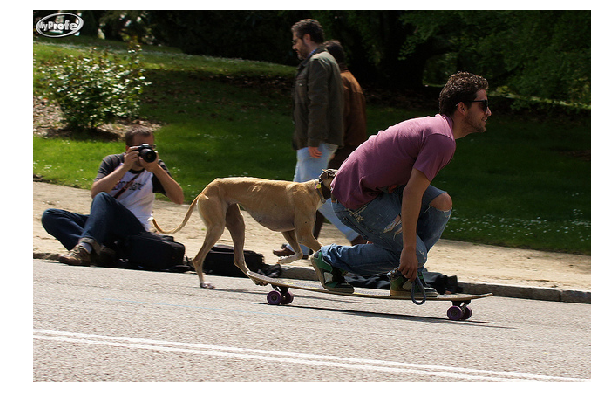

In [49]:
I = io.imread(dataDir + 'images/' + 'train2017/' + '000000' + str(img['id']) + '.jpg')
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

[[0, 0, 700, 0, 200, 200, 100, 0]]
[[0, 0, 700, 0, 700, 700, 0, 700]]


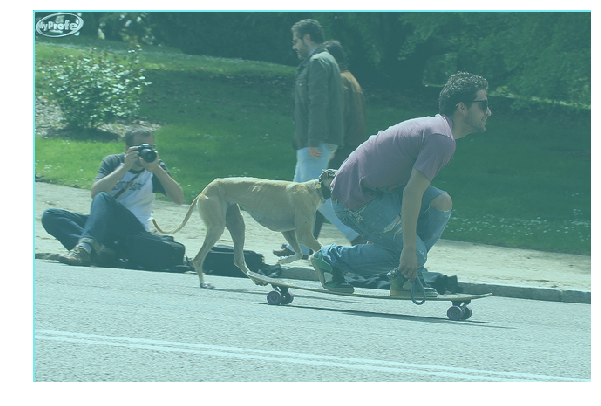

In [60]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
#[print(val) for val in item for item in anns]
# print(len(anns))
# for item in anns:
#     print(item['category_id'], item['bbox'], item['segmentation'])

#print(type(anns))

#print(anns)

#print(anns[0])    
#print(list(anns[0])[0])
    
# print(len(anns))    
# for item in anns:
#     for val in item:
#         print(val)

custom_poly = [0, 0, 700, 0, 700, 700, 0, 700]
custom_l = list()
custom_l.append(custom_poly)

# BINGO
temp_list = list()
temp_list.append(anns[0])
print(temp_list[0]['segmentation'])
#print(temp_list['segmentation']['counts'])
temp_list[0]['segmentation'] = custom_l
print(temp_list[0]['segmentation'])
coco.showAnns(temp_list)
#print(type(temp_list[0]['segmentation'][0]))

In [57]:
#print(temp_list[0]['image_id'])
mask_as_arr = coco.annToMask(temp_list[0])
np.sum(coco.annToMask(temp_list[0]))

2142

In [56]:
from PIL import Image

img = Image.fromarray(coco.annToMask(temp_list[0]), '1')
img.save('my.jpg')
img.show()

In [63]:
num_set = set()
for ix,iy in np.ndindex(mask_as_arr.shape):
    if(mask_as_arr[ix,iy] != 0):    
        mask_as_arr[ix,iy] = 255
        #num_set.add(mask_as_arr[ix,iy])
        #print(mask_as_arr[ix,iy])

In [65]:
img = Image.fromarray(mask_as_arr, 'L')
#img.save('my.jpg')
img.show()